<a href="https://colab.research.google.com/github/rish4/NewColonoscopy/blob/main/New_26.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
import keras
import tensorflow as tf
from keras import backend as K
from keras import metrics
from keras.regularizers import l2
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, InputLayer, Activation
from keras.preprocessing.image import ImageDataGenerator
from keras.metrics import AUC
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
from keras import models
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import numpy as np
from keras.preprocessing import image
from IPython.display import display
from PIL import Image

**Adam Optimizer**

In [2]:
## Set file paths to image files

train_path1 = "/content/drive/MyDrive/NewDB/Training set"
test_path1 = "/content/drive/MyDrive/NewDB/Test set"

## Set up hyperparameters that will be used later
hyper_dimension1 = 128
hyper_batch_size1 = 32
hyper_channels1 = 3
hyper_mode1 = 'rgb'

## Generate batches of image data (train, validation, and test) with data augmentation
train_datagen1 = ImageDataGenerator(rescale=1.0/255.0, 
                                   shear_range = 0.2,
                                   zoom_range = 0.2, 
                                   horizontal_flip = True )

test_datagen1 = ImageDataGenerator(rescale=1.0/255.0) 

train_generator1 = train_datagen1.flow_from_directory(directory = train_path1, 
                                                    target_size = (hyper_dimension1, hyper_dimension1),
                                                    batch_size = hyper_batch_size1, 
                                                    color_mode = hyper_mode1,
                                                    class_mode = 'binary', 
                                                    seed = 42)

test_generator1 = test_datagen1.flow_from_directory(directory = test_path1, 
                                                 target_size = (hyper_dimension1, hyper_dimension1),
                                                 batch_size = hyper_batch_size1, 
                                                 class_mode = 'binary',
                                                 color_mode = hyper_mode1,
                                                 shuffle=False,
                                                 seed = 42)

test_generator1.reset()

Found 1656 images belonging to 2 classes.
Found 415 images belonging to 2 classes.


In [3]:
cnn1 = Sequential()
cnn1.add(InputLayer(input_shape=(hyper_dimension1, hyper_dimension1, hyper_channels1)))

cnn1.add(Conv2D(filters=16, kernel_size=3, activation='relu'))
cnn1.add(MaxPooling2D(pool_size=(2,2)))

cnn1.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn1.add(MaxPooling2D(pool_size=(2,2)))

cnn1.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn1.add(MaxPooling2D(pool_size=(2,2)))

cnn1.add(Flatten())

cnn1.add(Dense(activation='relu', units=128))
cnn1.add(Dense(activation='sigmoid', units=1))

cnn1.summary()

cnn1.compile(optimizer= 'adam', loss='binary_crossentropy', metrics=['accuracy'])
cnn_model1 = cnn1.fit_generator(train_generator1, 
                              steps_per_epoch = len(train_generator1), 
                              epochs = 50, 
                              validation_data = test_generator1,
                              validation_steps = len(test_generator1)
                              )

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
52/52 [==============================] - 533s 10s/step - loss: 0.6569 - accuracy: 0.5974 - val_loss: 0.4902 - val_accuracy: 0.7807
Epoch 2/50
52/52 [==============================] - 61s 1s/step - loss: 0.4986 - accuracy: 0.7432 - val_loss: 0.3257 - val_accuracy: 0.8651
Epoch 3/50
52/52 [==============================] - 61s 1s/step - loss: 0.3737 - accuracy: 0.8365 - val_loss: 0.3667 - val_accuracy: 0.8627
Epoch 4/50
52/52 [==============================] - 61s 1s/step - loss: 0.3864 - accuracy: 0.8207 - val_loss: 0.3388 - val_accuracy: 0.8578
Epoch 5/50
52/52 [==============================] - 62s 1s/step - loss: 0.3125 - accuracy: 0.8695 - val_loss: 0.4176 - val_accuracy: 0.7976
Epoch 6/50
52/52 [==============================] - 61s 1s/step - loss: 0.2881 - accuracy: 0.8791 - val_loss: 0.2897 - val_accuracy: 0.8916
Epoch 7/50
52/52 [==============================] - 61s 1s/step - loss: 0.2924 - accuracy: 0.8689 - val_loss: 0.3805 - val_accuracy: 0.8482
Epoch 8/50
52/52 [

In [4]:
def create_charts1(cnn, cnn_model):
    ## DEFINE ##
    ## Define 1:  train & validation loss
    train_loss = cnn_model.history['loss']
    val_loss = cnn_model.history['val_loss']
    
    ## Define 2: train & validation AUC
    train_auc_name = list(cnn_model.history.keys())[3]
    val_auc_name = list(cnn_model.history.keys())[1]
    train_auc = cnn_model.history[train_auc_name]
    val_auc = cnn_model.history[val_auc_name]
    
    ## Define 3: y_pred & y_true
    y_true = test_generator1.classes
    #print(y_true)
    Y_pred = cnn.predict_generator(test_generator1, steps = len(test_generator1))
    y_pred = (Y_pred > 0.5).T[0]
    #print(y_pred)
    y_pred_prob = Y_pred.T[0]
    #print(y_pred_prob)
    
    ## PLOT ##
    fig = plt.figure(figsize=(13, 10))
    
    ## PLOT 1: TRAIN VS. VALIDATION LOSS 
    plt.subplot(2,2,1)
    plt.title("Training vs. Validation Loss")
    plt.plot(train_loss, label='training loss')
    plt.plot(val_loss, label='validation loss')
    plt.xlabel("Number of Epochs", size=14)
    plt.legend()

    ## PLOT 2: TRAIN VS. VALIDATION AUC
    plt.subplot(2,2,2)
    plt.title("Training vs. Validation AUC Score")
    plt.plot(train_auc, label='training auc')
    plt.plot(val_auc, label='validation auc')
    plt.xlabel("Number of Epochs", size=14)
    plt.legend()
    
    ## PLOT 3: CONFUSION MATRIX
    plt.subplot(2,2,3)
      # Set up the labels for in the confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    names = ['True Negatives', 'False Positives', 'False Negatives', 'True Positives']
    counts = ['{0:0.0f}'.format(value) for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}' for v1, v2 in zip(names, percentages)]
    labels = np.asarray(labels).reshape(2,2)
    ticklabels = ['Normal', 'Abnormal']

      # Create confusion matrix as heatmap
    sns.set(font_scale = 1.4)
    ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Oranges', xticklabels=ticklabels, yticklabels=ticklabels )
    plt.xticks(size=12)
    plt.yticks(size=12)
    plt.title("Confusion Matrix") #plt.title("Confusion Matrix\n", fontsize=10)
    plt.xlabel("Predicted", size=14)
    plt.ylabel("Actual", size=14) 
    #plt.savefig('cm.png', transparent=True) 
    
    ## PLOT 4: ROC CURVE
    plt.subplot(2,2,4)
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)
    auc = roc_auc_score(y_true, y_pred_prob)
    plt.title('ROC Curve')
    plt.plot([0, 1], [0, 1], 'k--', label = "Random (AUC = 50%)")
    plt.plot(fpr, tpr, label='CNN (AUC = {:.2f}%)'.format(auc*100))
    plt.xlabel('False Positive Rate', size=14)
    plt.ylabel('True Positive Rate', size=14)
    plt.legend(loc='best')
    #plt.savefig('roc.png', bbox_inches='tight', pad_inches=1)
    
    ## END PLOTS
    plt.tight_layout()
    ;
    
    ## Summary Statistics
    TN, FP, FN, TP = cm.ravel() # cm[0,0], cm[0, 1], cm[1, 0], cm[1, 1]
    accuracy = (TP + TN) / np.sum(cm) # % positive out of all predicted positives
    precision = TP / (TP+FP) # % positive out of all predicted positives
    recall =  TP / (TP+FN) # % positive out of all supposed to be positives
    specificity = TN / (TN+FP) # % negative out of all supposed to be negatives
    f1 = 2*precision*recall / (precision + recall)
    stats_summary = '[Summary Statistics]\nAccuracy = {:.2%} | Precision = {:.2%} | Recall = {:.2%} | Specificity = {:.2%} | F1 Score = {:.2%}'.format(accuracy, precision, recall, specificity, f1)
    print(stats_summary)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1976: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


[Summary Statistics]
Accuracy = 64.10% | Precision = 66.67% | Recall = 61.40% | Specificity = 67.00% | F1 Score = 63.92%


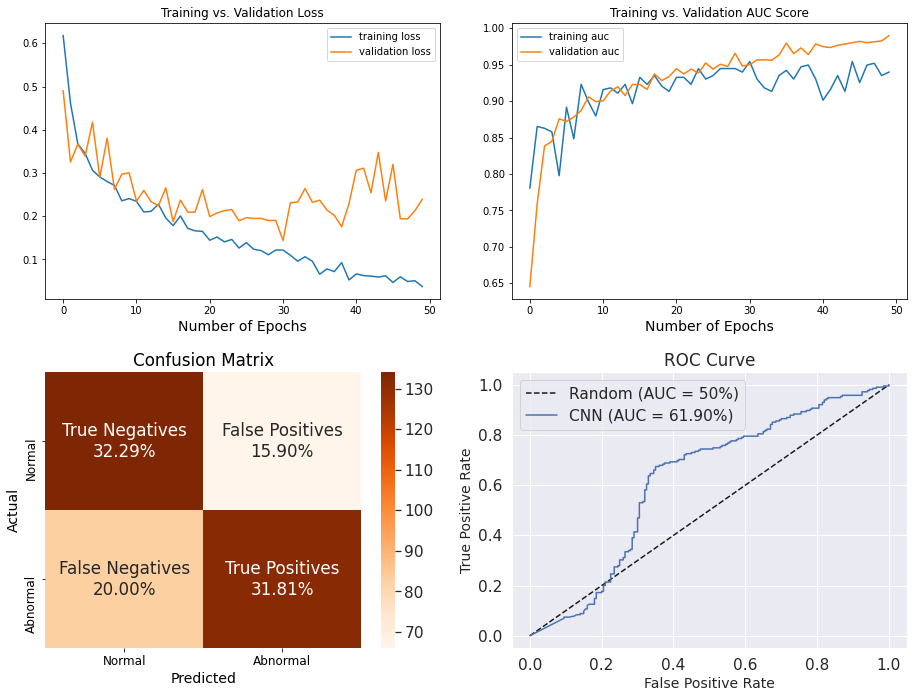

In [5]:
create_charts1(cnn1, cnn_model1)

**SGD Optimizer**

In [6]:
## Set file paths to image files

train_path2 = "/content/drive/MyDrive/NewDB/Training set"
test_path2 = "/content/drive/MyDrive/NewDB/Test set"

## Set up hyperparameters that will be used later
hyper_dimension2 = 128
hyper_batch_size2 = 32
hyper_channels2 = 3
hyper_mode2 = 'rgb'

## Generate batches of image data (train, validation, and test) with data augmentation
train_datagen2 = ImageDataGenerator(rescale=1.0/255.0, 
                                   shear_range = 0.2,
                                   zoom_range = 0.2, 
                                   horizontal_flip = True )

test_datagen2 = ImageDataGenerator(rescale=1.0/255.0) 

train_generator2 = train_datagen2.flow_from_directory(directory = train_path2, 
                                                    target_size = (hyper_dimension2, hyper_dimension2),
                                                    batch_size = hyper_batch_size2, 
                                                    color_mode = hyper_mode2,
                                                    class_mode = 'binary', 
                                                    seed = 42)

test_generator2 = test_datagen2.flow_from_directory(directory = test_path2, 
                                                 target_size = (hyper_dimension2, hyper_dimension2),
                                                 batch_size = hyper_batch_size2, 
                                                 class_mode = 'binary',
                                                 color_mode = hyper_mode2,
                                                 shuffle=False,
                                                 seed = 42)

test_generator2.reset()

Found 1656 images belonging to 2 classes.
Found 415 images belonging to 2 classes.


In [7]:
cnn2 = Sequential()
cnn2.add(InputLayer(input_shape=(hyper_dimension2, hyper_dimension2, hyper_channels2)))

cnn2.add(Conv2D(filters=16, kernel_size=3, activation='relu'))
cnn2.add(MaxPooling2D(pool_size=(2,2)))

cnn2.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn2.add(MaxPooling2D(pool_size=(2,2)))

cnn2.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn2.add(MaxPooling2D(pool_size=(2,2)))

cnn2.add(Flatten())

cnn2.add(Dense(activation='relu', units=128))
cnn2.add(Dense(activation='sigmoid', units=1))

cnn2.summary()

cnn2.compile(optimizer= 'SGD', loss='binary_crossentropy', metrics=['accuracy'])
cnn_model2 = cnn2.fit_generator(train_generator1, 
                              steps_per_epoch = len(train_generator2), 
                              epochs = 50, 
                              validation_data = test_generator2,
                              validation_steps = len(test_generator2)
                              )

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 126, 126, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 63, 63, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 61, 61, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 12544)            

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
52/52 [==============================] - 62s 1s/step - loss: 0.6873 - accuracy: 0.5534 - val_loss: 0.6727 - val_accuracy: 0.7398
Epoch 2/50
52/52 [==============================] - 61s 1s/step - loss: 0.6670 - accuracy: 0.6859 - val_loss: 0.6477 - val_accuracy: 0.6072
Epoch 3/50
52/52 [==============================] - 61s 1s/step - loss: 0.6349 - accuracy: 0.6465 - val_loss: 0.6294 - val_accuracy: 0.6699
Epoch 4/50
52/52 [==============================] - 61s 1s/step - loss: 0.6037 - accuracy: 0.6635 - val_loss: 0.5743 - val_accuracy: 0.7133
Epoch 5/50
52/52 [==============================] - 61s 1s/step - loss: 0.5697 - accuracy: 0.6958 - val_loss: 0.5580 - val_accuracy: 0.7036
Epoch 6/50
52/52 [==============================] - 61s 1s/step - loss: 0.5614 - accuracy: 0.7026 - val_loss: 0.5195 - val_accuracy: 0.7446
Epoch 7/50
52/52 [==============================] - 61s 1s/step - loss: 0.5404 - accuracy: 0.7057 - val_loss: 0.7717 - val_accuracy: 0.6217
Epoch 8/50
52/52 [==

In [8]:
def create_charts2(cnn, cnn_model):
    ## DEFINE ##
    ## Define 1:  train & validation loss
    train_loss = cnn_model.history['loss']
    val_loss = cnn_model.history['val_loss']
    
    ## Define 2: train & validation AUC
    train_auc_name = list(cnn_model.history.keys())[3]
    val_auc_name = list(cnn_model.history.keys())[1]
    train_auc = cnn_model.history[train_auc_name]
    val_auc = cnn_model.history[val_auc_name]
    
    ## Define 3: y_pred & y_true
    y_true = test_generator2.classes
    #print(y_true)
    Y_pred = cnn.predict_generator(test_generator2, steps = len(test_generator2))
    y_pred = (Y_pred > 0.5).T[0]
    #print(y_pred)
    y_pred_prob = Y_pred.T[0]
    #print(y_pred_prob)
    
    ## PLOT ##
    fig = plt.figure(figsize=(13, 10))
    
    ## PLOT 1: TRAIN VS. VALIDATION LOSS 
    plt.subplot(2,2,1)
    plt.title("Training vs. Validation Loss")
    plt.plot(train_loss, label='training loss')
    plt.plot(val_loss, label='validation loss')
    plt.xlabel("Number of Epochs", size=14)
    plt.legend()

    ## PLOT 2: TRAIN VS. VALIDATION AUC
    plt.subplot(2,2,2)
    plt.title("Training vs. Validation AUC Score")
    plt.plot(train_auc, label='training auc')
    plt.plot(val_auc, label='validation auc')
    plt.xlabel("Number of Epochs", size=14)
    plt.legend()
    
    ## PLOT 3: CONFUSION MATRIX
    plt.subplot(2,2,3)
      # Set up the labels for in the confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    names = ['True Negatives', 'False Positives', 'False Negatives', 'True Positives']
    counts = ['{0:0.0f}'.format(value) for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}' for v1, v2 in zip(names, percentages)]
    labels = np.asarray(labels).reshape(2,2)
    ticklabels = ['Normal', 'Abnormal']

      # Create confusion matrix as heatmap
    sns.set(font_scale = 1.4)
    ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Oranges', xticklabels=ticklabels, yticklabels=ticklabels )
    plt.xticks(size=12)
    plt.yticks(size=12)
    plt.title("Confusion Matrix") #plt.title("Confusion Matrix\n", fontsize=10)
    plt.xlabel("Predicted", size=14)
    plt.ylabel("Actual", size=14) 
    #plt.savefig('cm.png', transparent=True) 
    
    ## PLOT 4: ROC CURVE
    plt.subplot(2,2,4)
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)
    auc = roc_auc_score(y_true, y_pred_prob)
    plt.title('ROC Curve')
    plt.plot([0, 1], [0, 1], 'k--', label = "Random (AUC = 50%)")
    plt.plot(fpr, tpr, label='CNN (AUC = {:.2f}%)'.format(auc*100))
    plt.xlabel('False Positive Rate', size=14)
    plt.ylabel('True Positive Rate', size=14)
    plt.legend(loc='best')
    #plt.savefig('roc.png', bbox_inches='tight', pad_inches=1)
    
    ## END PLOTS
    plt.tight_layout()
    ;
    
    ## Summary Statistics
    TN, FP, FN, TP = cm.ravel() # cm[0,0], cm[0, 1], cm[1, 0], cm[1, 1]
    accuracy = (TP + TN) / np.sum(cm) # % positive out of all predicted positives
    precision = TP / (TP+FP) # % positive out of all predicted positives
    recall =  TP / (TP+FN) # % positive out of all supposed to be positives
    specificity = TN / (TN+FP) # % negative out of all supposed to be negatives
    f1 = 2*precision*recall / (precision + recall)
    stats_summary = '[Summary Statistics]\nAccuracy = {:.2%} | Precision = {:.2%} | Recall = {:.2%} | Specificity = {:.2%} | F1 Score = {:.2%}'.format(accuracy, precision, recall, specificity, f1)
    print(stats_summary)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1976: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


[Summary Statistics]
Accuracy = 58.80% | Precision = 61.34% | Recall = 55.35% | Specificity = 62.50% | F1 Score = 58.19%


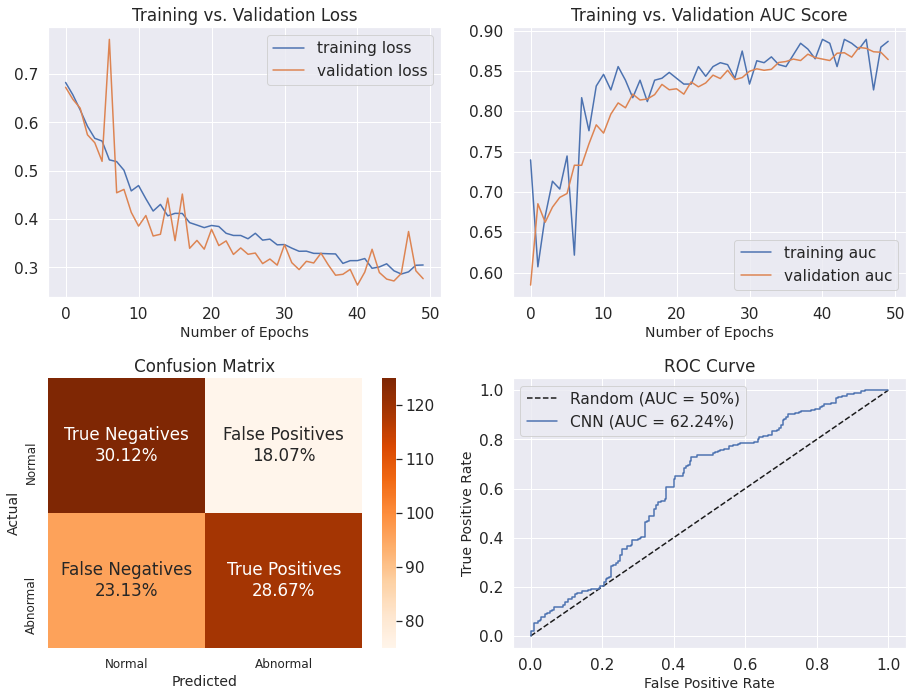

In [9]:
create_charts2(cnn2, cnn_model2)

**RMSprop Optimizer**

In [10]:
## Set file paths to image files

train_path3 = "/content/drive/MyDrive/NewDB/Training set"
test_path3 = "/content/drive/MyDrive/NewDB/Test set"

## Set up hyperparameters that will be used later
hyper_dimension3 = 128
hyper_batch_size3 = 32
hyper_channels3 = 3
hyper_mode3= 'rgb'

## Generate batches of image data (train, validation, and test) with data augmentation
train_datagen3 = ImageDataGenerator(rescale=1.0/255.0, 
                                   shear_range = 0.2,
                                   zoom_range = 0.2, 
                                   horizontal_flip = True )

test_datagen3 = ImageDataGenerator(rescale=1.0/255.0) 

train_generator3 = train_datagen3.flow_from_directory(directory = train_path3, 
                                                    target_size = (hyper_dimension3, hyper_dimension3),
                                                    batch_size = hyper_batch_size3, 
                                                    color_mode = hyper_mode3,
                                                    class_mode = 'binary', 
                                                    seed = 42)

test_generator3 = test_datagen3.flow_from_directory(directory = test_path3, 
                                                 target_size = (hyper_dimension3, hyper_dimension3),
                                                 batch_size = hyper_batch_size3, 
                                                 class_mode = 'binary',
                                                 color_mode = hyper_mode3,
                                                 shuffle=False,
                                                 seed = 42)

test_generator3.reset()

Found 1656 images belonging to 2 classes.
Found 415 images belonging to 2 classes.


In [11]:
cnn3 = Sequential()
cnn3.add(InputLayer(input_shape=(hyper_dimension3, hyper_dimension3, hyper_channels3)))

cnn3.add(Conv2D(filters=16, kernel_size=3, activation='relu'))
cnn3.add(MaxPooling2D(pool_size=(2,2)))

cnn3.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn3.add(MaxPooling2D(pool_size=(2,2)))

cnn3.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn3.add(MaxPooling2D(pool_size=(2,2)))

cnn3.add(Flatten())

cnn3.add(Dense(activation='relu', units=128))
cnn3.add(Dense(activation='sigmoid', units=1))

cnn3.summary()

cnn3.compile(optimizer= 'RMSprop', loss='binary_crossentropy', metrics=['accuracy'])
cnn_model3 = cnn3.fit_generator(train_generator3, 
                              steps_per_epoch = len(train_generator3), 
                              epochs = 50, 
                              validation_data = test_generator3,
                              validation_steps = len(test_generator3)
                              )

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 126, 126, 16)      448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 63, 63, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 61, 61, 32)        4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 12544)            

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
52/52 [==============================] - 63s 1s/step - loss: 0.9999 - accuracy: 0.5817 - val_loss: 0.5658 - val_accuracy: 0.6289
Epoch 2/50
52/52 [==============================] - 60s 1s/step - loss: 0.5902 - accuracy: 0.6937 - val_loss: 0.4007 - val_accuracy: 0.8289
Epoch 3/50
52/52 [==============================] - 61s 1s/step - loss: 0.4488 - accuracy: 0.7801 - val_loss: 1.3963 - val_accuracy: 0.5349
Epoch 4/50
52/52 [==============================] - 61s 1s/step - loss: 0.4743 - accuracy: 0.7961 - val_loss: 0.4747 - val_accuracy: 0.6940
Epoch 5/50
52/52 [==============================] - 61s 1s/step - loss: 0.3675 - accuracy: 0.8291 - val_loss: 0.2645 - val_accuracy: 0.9108
Epoch 6/50
52/52 [==============================] - 61s 1s/step - loss: 0.3157 - accuracy: 0.8632 - val_loss: 0.4733 - val_accuracy: 0.7422
Epoch 7/50
52/52 [==============================] - 61s 1s/step - loss: 0.3424 - accuracy: 0.8393 - val_loss: 0.3841 - val_accuracy: 0.7928
Epoch 8/50
52/52 [==

In [12]:
def create_charts3(cnn, cnn_model):
    ## DEFINE ##
    ## Define 1:  train & validation loss
    train_loss = cnn_model.history['loss']
    val_loss = cnn_model.history['val_loss']
    
    ## Define 2: train & validation AUC
    train_auc_name = list(cnn_model.history.keys())[3]
    val_auc_name = list(cnn_model.history.keys())[1]
    train_auc = cnn_model.history[train_auc_name]
    val_auc = cnn_model.history[val_auc_name]
    
    ## Define 3: y_pred & y_true
    y_true = test_generator3.classes
    #print(y_true)
    Y_pred = cnn.predict_generator(test_generator3, steps = len(test_generator3))
    y_pred = (Y_pred > 0.5).T[0]
    #print(y_pred)
    y_pred_prob = Y_pred.T[0]
    #print(y_pred_prob)
    
    ## PLOT ##
    fig = plt.figure(figsize=(13, 10))
    
    ## PLOT 1: TRAIN VS. VALIDATION LOSS 
    plt.subplot(2,2,1)
    plt.title("Training vs. Validation Loss")
    plt.plot(train_loss, label='training loss')
    plt.plot(val_loss, label='validation loss')
    plt.xlabel("Number of Epochs", size=14)
    plt.legend()

    ## PLOT 2: TRAIN VS. VALIDATION AUC
    plt.subplot(2,2,2)
    plt.title("Training vs. Validation AUC Score")
    plt.plot(train_auc, label='training auc')
    plt.plot(val_auc, label='validation auc')
    plt.xlabel("Number of Epochs", size=14)
    plt.legend()
    
    ## PLOT 3: CONFUSION MATRIX
    plt.subplot(2,2,3)
      # Set up the labels for in the confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    names = ['True Negatives', 'False Positives', 'False Negatives', 'True Positives']
    counts = ['{0:0.0f}'.format(value) for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}' for v1, v2 in zip(names, percentages)]
    labels = np.asarray(labels).reshape(2,2)
    ticklabels = ['Normal', 'Abnormal']

      # Create confusion matrix as heatmap
    sns.set(font_scale = 1.4)
    ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Oranges', xticklabels=ticklabels, yticklabels=ticklabels )
    plt.xticks(size=12)
    plt.yticks(size=12)
    plt.title("Confusion Matrix") #plt.title("Confusion Matrix\n", fontsize=10)
    plt.xlabel("Predicted", size=14)
    plt.ylabel("Actual", size=14) 
    #plt.savefig('cm.png', transparent=True) 
    
    ## PLOT 4: ROC CURVE
    plt.subplot(2,2,4)
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)
    auc = roc_auc_score(y_true, y_pred_prob)
    plt.title('ROC Curve')
    plt.plot([0, 1], [0, 1], 'k--', label = "Random (AUC = 50%)")
    plt.plot(fpr, tpr, label='CNN (AUC = {:.2f}%)'.format(auc*100))
    plt.xlabel('False Positive Rate', size=14)
    plt.ylabel('True Positive Rate', size=14)
    plt.legend(loc='best')
    #plt.savefig('roc.png', bbox_inches='tight', pad_inches=1)
    
    ## END PLOTS
    plt.tight_layout()
    ;
    
    ## Summary Statistics
    TN, FP, FN, TP = cm.ravel() # cm[0,0], cm[0, 1], cm[1, 0], cm[1, 1]
    accuracy = (TP + TN) / np.sum(cm) # % positive out of all predicted positives
    precision = TP / (TP+FP) # % positive out of all predicted positives
    recall =  TP / (TP+FN) # % positive out of all supposed to be positives
    specificity = TN / (TN+FP) # % negative out of all supposed to be negatives
    f1 = 2*precision*recall / (precision + recall)
    stats_summary = '[Summary Statistics]\nAccuracy = {:.2%} | Precision = {:.2%} | Recall = {:.2%} | Specificity = {:.2%} | F1 Score = {:.2%}'.format(accuracy, precision, recall, specificity, f1)
    print(stats_summary)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1976: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


[Summary Statistics]
Accuracy = 63.61% | Precision = 64.95% | Recall = 64.65% | Specificity = 62.50% | F1 Score = 64.80%


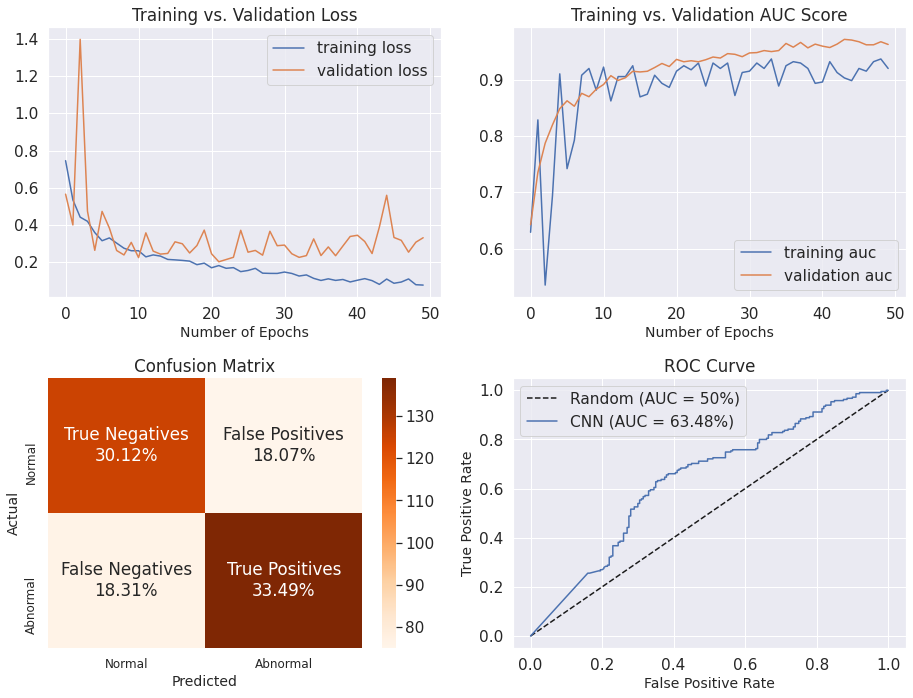

In [13]:
create_charts3(cnn3, cnn_model3)

**Adadelta Optimizer**

In [14]:
## Set file paths to image files

train_path4 = "/content/drive/MyDrive/NewDB/Training set"
test_path4 = "/content/drive/MyDrive/NewDB/Test set"

## Set up hyperparameters that will be used later
hyper_dimension4 = 128
hyper_batch_size4 = 32
hyper_channels4 = 3
hyper_mode4= 'rgb'

## Generate batches of image data (train, validation, and test) with data augmentation
train_datagen4 = ImageDataGenerator(rescale=1.0/255.0, 
                                   shear_range = 0.2,
                                   zoom_range = 0.2, 
                                   horizontal_flip = True )

test_datagen4 = ImageDataGenerator(rescale=1.0/255.0) 

train_generator4 = train_datagen4.flow_from_directory(directory = train_path4, 
                                                    target_size = (hyper_dimension4, hyper_dimension4),
                                                    batch_size = hyper_batch_size4, 
                                                    color_mode = hyper_mode4,
                                                    class_mode = 'binary', 
                                                    seed = 42)

test_generator4 = test_datagen4.flow_from_directory(directory = test_path4, 
                                                 target_size = (hyper_dimension4, hyper_dimension4),
                                                 batch_size = hyper_batch_size4, 
                                                 class_mode = 'binary',
                                                 color_mode = hyper_mode4,
                                                 shuffle=False,
                                                 seed = 42)

test_generator4.reset()

Found 1656 images belonging to 2 classes.
Found 415 images belonging to 2 classes.


In [15]:
cnn4 = Sequential()
cnn4.add(InputLayer(input_shape=(hyper_dimension4, hyper_dimension4, hyper_channels4)))

cnn4.add(Conv2D(filters=16, kernel_size=3, activation='relu'))
cnn4.add(MaxPooling2D(pool_size=(2,2)))

cnn4.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn4.add(MaxPooling2D(pool_size=(2,2)))

cnn4.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn4.add(MaxPooling2D(pool_size=(2,2)))

cnn4.add(Flatten())

cnn4.add(Dense(activation='relu', units=128))
cnn4.add(Dense(activation='sigmoid', units=1))

cnn4.summary()

cnn4.compile(optimizer= 'Adadelta', loss='binary_crossentropy', metrics=['accuracy'])
cnn_model4 = cnn4.fit_generator(train_generator4, 
                              steps_per_epoch = len(train_generator4), 
                              epochs = 50, 
                              validation_data = test_generator4,
                              validation_steps = len(test_generator4)
                              )

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 126, 126, 16)      448       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 63, 63, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 61, 61, 32)        4640      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 12544)            

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
52/52 [==============================] - 63s 1s/step - loss: 0.6918 - accuracy: 0.5007 - val_loss: 0.6944 - val_accuracy: 0.4819
Epoch 2/50
52/52 [==============================] - 61s 1s/step - loss: 0.6893 - accuracy: 0.4940 - val_loss: 0.6924 - val_accuracy: 0.4819
Epoch 3/50
52/52 [==============================] - 61s 1s/step - loss: 0.6895 - accuracy: 0.4799 - val_loss: 0.6910 - val_accuracy: 0.4819
Epoch 4/50
52/52 [==============================] - 61s 1s/step - loss: 0.6866 - accuracy: 0.5036 - val_loss: 0.6898 - val_accuracy: 0.4867
Epoch 5/50
52/52 [==============================] - 61s 1s/step - loss: 0.6826 - accuracy: 0.5216 - val_loss: 0.6887 - val_accuracy: 0.4867
Epoch 6/50
52/52 [==============================] - 61s 1s/step - loss: 0.6829 - accuracy: 0.5354 - val_loss: 0.6877 - val_accuracy: 0.4964
Epoch 7/50
52/52 [==============================] - 61s 1s/step - loss: 0.6837 - accuracy: 0.5667 - val_loss: 0.6865 - val_accuracy: 0.4988
Epoch 8/50
52/52 [==

In [16]:
def create_charts4(cnn, cnn_model):
    ## DEFINE ##
    ## Define 1:  train & validation loss
    train_loss = cnn_model.history['loss']
    val_loss = cnn_model.history['val_loss']
    
    ## Define 2: train & validation AUC
    train_auc_name = list(cnn_model.history.keys())[3]
    val_auc_name = list(cnn_model.history.keys())[1]
    train_auc = cnn_model.history[train_auc_name]
    val_auc = cnn_model.history[val_auc_name]
    
    ## Define 3: y_pred & y_true
    y_true = test_generator4.classes
    #print(y_true)
    Y_pred = cnn.predict_generator(test_generator4, steps = len(test_generator4))
    y_pred = (Y_pred > 0.5).T[0]
    #print(y_pred)
    y_pred_prob = Y_pred.T[0]
    #print(y_pred_prob)
    
    ## PLOT ##
    fig = plt.figure(figsize=(13, 10))
    
    ## PLOT 1: TRAIN VS. VALIDATION LOSS 
    plt.subplot(2,2,1)
    plt.title("Training vs. Validation Loss")
    plt.plot(train_loss, label='training loss')
    plt.plot(val_loss, label='validation loss')
    plt.xlabel("Number of Epochs", size=14)
    plt.legend()

    ## PLOT 2: TRAIN VS. VALIDATION AUC
    plt.subplot(2,2,2)
    plt.title("Training vs. Validation AUC Score")
    plt.plot(train_auc, label='training auc')
    plt.plot(val_auc, label='validation auc')
    plt.xlabel("Number of Epochs", size=14)
    plt.legend()
    
    ## PLOT 3: CONFUSION MATRIX
    plt.subplot(2,2,3)
      # Set up the labels for in the confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    names = ['True Negatives', 'False Positives', 'False Negatives', 'True Positives']
    counts = ['{0:0.0f}'.format(value) for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}' for v1, v2 in zip(names, percentages)]
    labels = np.asarray(labels).reshape(2,2)
    ticklabels = ['Normal', 'Abnormal']

      # Create confusion matrix as heatmap
    sns.set(font_scale = 1.4)
    ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Oranges', xticklabels=ticklabels, yticklabels=ticklabels )
    plt.xticks(size=12)
    plt.yticks(size=12)
    plt.title("Confusion Matrix") #plt.title("Confusion Matrix\n", fontsize=10)
    plt.xlabel("Predicted", size=14)
    plt.ylabel("Actual", size=14) 
    #plt.savefig('cm.png', transparent=True) 
    
    ## PLOT 4: ROC CURVE
    plt.subplot(2,2,4)
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)
    auc = roc_auc_score(y_true, y_pred_prob)
    plt.title('ROC Curve')
    plt.plot([0, 1], [0, 1], 'k--', label = "Random (AUC = 50%)")
    plt.plot(fpr, tpr, label='CNN (AUC = {:.2f}%)'.format(auc*100))
    plt.xlabel('False Positive Rate', size=14)
    plt.ylabel('True Positive Rate', size=14)
    plt.legend(loc='best')
    #plt.savefig('roc.png', bbox_inches='tight', pad_inches=1)
    
    ## END PLOTS
    plt.tight_layout()
    ;
    
    ## Summary Statistics
    TN, FP, FN, TP = cm.ravel() # cm[0,0], cm[0, 1], cm[1, 0], cm[1, 1]
    accuracy = (TP + TN) / np.sum(cm) # % positive out of all predicted positives
    precision = TP / (TP+FP) # % positive out of all predicted positives
    recall =  TP / (TP+FN) # % positive out of all supposed to be positives
    specificity = TN / (TN+FP) # % negative out of all supposed to be negatives
    f1 = 2*precision*recall / (precision + recall)
    stats_summary = '[Summary Statistics]\nAccuracy = {:.2%} | Precision = {:.2%} | Recall = {:.2%} | Specificity = {:.2%} | F1 Score = {:.2%}'.format(accuracy, precision, recall, specificity, f1)
    print(stats_summary)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1976: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


[Summary Statistics]
Accuracy = 49.88% | Precision = 52.55% | Recall = 33.49% | Specificity = 67.50% | F1 Score = 40.91%


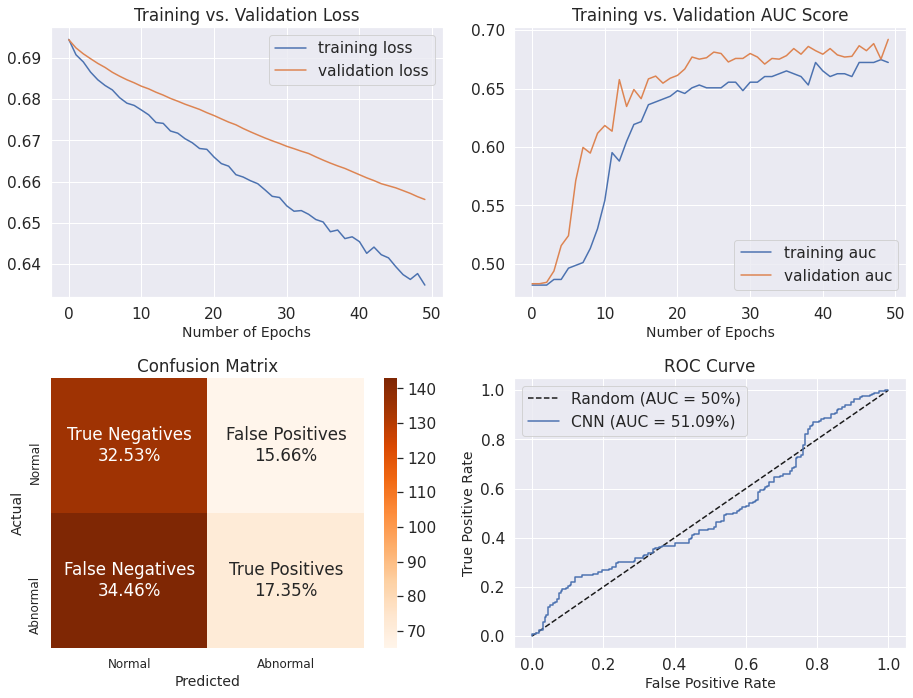

In [17]:
create_charts4(cnn4, cnn_model4)

**Adagrad Optimizer**

In [18]:
## Set file paths to image files

train_path5 = "/content/drive/MyDrive/NewDB/Training set"
test_path5 = "/content/drive/MyDrive/NewDB/Test set"

## Set up hyperparameters that will be used later
hyper_dimension5 = 128
hyper_batch_size5 = 32
hyper_channels5 = 3
hyper_mode5= 'rgb'

## Generate batches of image data (train, validation, and test) with data augmentation
train_datagen5 = ImageDataGenerator(rescale=1.0/255.0, 
                                   shear_range = 0.2,
                                   zoom_range = 0.2, 
                                   horizontal_flip = True )

test_datagen5 = ImageDataGenerator(rescale=1.0/255.0) 

train_generator5 = train_datagen5.flow_from_directory(directory = train_path5, 
                                                    target_size = (hyper_dimension5, hyper_dimension5),
                                                    batch_size = hyper_batch_size5, 
                                                    color_mode = hyper_mode5,
                                                    class_mode = 'binary', 
                                                    seed = 42)

test_generator5 = test_datagen5.flow_from_directory(directory = test_path5, 
                                                 target_size = (hyper_dimension5, hyper_dimension5),
                                                 batch_size = hyper_batch_size5, 
                                                 class_mode = 'binary',
                                                 color_mode = hyper_mode5,
                                                 shuffle=False,
                                                 seed = 42)

test_generator5.reset()

Found 1656 images belonging to 2 classes.
Found 415 images belonging to 2 classes.


In [19]:
cnn5 = Sequential()
cnn5.add(InputLayer(input_shape=(hyper_dimension5, hyper_dimension5, hyper_channels5)))

cnn5.add(Conv2D(filters=16, kernel_size=3, activation='relu'))
cnn5.add(MaxPooling2D(pool_size=(2,2)))

cnn5.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn5.add(MaxPooling2D(pool_size=(2,2)))

cnn5.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn5.add(MaxPooling2D(pool_size=(2,2)))

cnn5.add(Flatten())

cnn5.add(Dense(activation='relu', units=128))
cnn5.add(Dense(activation='sigmoid', units=1))

cnn5.summary()

cnn5.compile(optimizer= 'Adagrad', loss='binary_crossentropy', metrics=['accuracy'])
cnn_model5 = cnn5.fit_generator(train_generator5, 
                              steps_per_epoch = len(train_generator5), 
                              epochs = 50, 
                              validation_data = test_generator5,
                              validation_steps = len(test_generator5)
                              )

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 126, 126, 16)      448       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 63, 63, 16)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 61, 61, 32)        4640      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 12544)            

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
52/52 [==============================] - 63s 1s/step - loss: 0.6890 - accuracy: 0.5301 - val_loss: 0.6854 - val_accuracy: 0.5663
Epoch 2/50
52/52 [==============================] - 61s 1s/step - loss: 0.6816 - accuracy: 0.6191 - val_loss: 0.6794 - val_accuracy: 0.5831
Epoch 3/50
52/52 [==============================] - 62s 1s/step - loss: 0.6749 - accuracy: 0.6589 - val_loss: 0.6734 - val_accuracy: 0.6120
Epoch 4/50
52/52 [==============================] - 62s 1s/step - loss: 0.6672 - accuracy: 0.6604 - val_loss: 0.6673 - val_accuracy: 0.6482
Epoch 5/50
52/52 [==============================] - 62s 1s/step - loss: 0.6605 - accuracy: 0.6608 - val_loss: 0.6603 - val_accuracy: 0.6458
Epoch 6/50
52/52 [==============================] - 62s 1s/step - loss: 0.6527 - accuracy: 0.6606 - val_loss: 0.6528 - val_accuracy: 0.6819
Epoch 7/50
52/52 [==============================] - 61s 1s/step - loss: 0.6455 - accuracy: 0.6638 - val_loss: 0.6506 - val_accuracy: 0.6482
Epoch 8/50
52/52 [==

In [20]:
def create_charts5(cnn, cnn_model):
    ## DEFINE ##
    ## Define 1:  train & validation loss
    train_loss = cnn_model.history['loss']
    val_loss = cnn_model.history['val_loss']
    
    ## Define 2: train & validation AUC
    train_auc_name = list(cnn_model.history.keys())[3]
    val_auc_name = list(cnn_model.history.keys())[1]
    train_auc = cnn_model.history[train_auc_name]
    val_auc = cnn_model.history[val_auc_name]
    
    ## Define 3: y_pred & y_true
    y_true = test_generator5.classes
    #print(y_true)
    Y_pred = cnn.predict_generator(test_generator5, steps = len(test_generator5))
    y_pred = (Y_pred > 0.5).T[0]
    #print(y_pred)
    y_pred_prob = Y_pred.T[0]
    #print(y_pred_prob)
    
    ## PLOT ##
    fig = plt.figure(figsize=(13, 10))
    
    ## PLOT 1: TRAIN VS. VALIDATION LOSS 
    plt.subplot(2,2,1)
    plt.title("Training vs. Validation Loss")
    plt.plot(train_loss, label='training loss')
    plt.plot(val_loss, label='validation loss')
    plt.xlabel("Number of Epochs", size=14)
    plt.legend()

    ## PLOT 2: TRAIN VS. VALIDATION AUC
    plt.subplot(2,2,2)
    plt.title("Training vs. Validation AUC Score")
    plt.plot(train_auc, label='training auc')
    plt.plot(val_auc, label='validation auc')
    plt.xlabel("Number of Epochs", size=14)
    plt.legend()
    
    ## PLOT 3: CONFUSION MATRIX
    plt.subplot(2,2,3)
      # Set up the labels for in the confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    names = ['True Negatives', 'False Positives', 'False Negatives', 'True Positives']
    counts = ['{0:0.0f}'.format(value) for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}' for v1, v2 in zip(names, percentages)]
    labels = np.asarray(labels).reshape(2,2)
    ticklabels = ['Normal', 'Abnormal']

      # Create confusion matrix as heatmap
    sns.set(font_scale = 1.4)
    ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Oranges', xticklabels=ticklabels, yticklabels=ticklabels )
    plt.xticks(size=12)
    plt.yticks(size=12)
    plt.title("Confusion Matrix") #plt.title("Confusion Matrix\n", fontsize=10)
    plt.xlabel("Predicted", size=14)
    plt.ylabel("Actual", size=14) 
    #plt.savefig('cm.png', transparent=True) 
    
    ## PLOT 4: ROC CURVE
    plt.subplot(2,2,4)
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)
    auc = roc_auc_score(y_true, y_pred_prob)
    plt.title('ROC Curve')
    plt.plot([0, 1], [0, 1], 'k--', label = "Random (AUC = 50%)")
    plt.plot(fpr, tpr, label='CNN (AUC = {:.2f}%)'.format(auc*100))
    plt.xlabel('False Positive Rate', size=14)
    plt.ylabel('True Positive Rate', size=14)
    plt.legend(loc='best')
    #plt.savefig('roc.png', bbox_inches='tight', pad_inches=1)
    
    ## END PLOTS
    plt.tight_layout()
    ;
    
    ## Summary Statistics
    TN, FP, FN, TP = cm.ravel() # cm[0,0], cm[0, 1], cm[1, 0], cm[1, 1]
    accuracy = (TP + TN) / np.sum(cm) # % positive out of all predicted positives
    precision = TP / (TP+FP) # % positive out of all predicted positives
    recall =  TP / (TP+FN) # % positive out of all supposed to be positives
    specificity = TN / (TN+FP) # % negative out of all supposed to be negatives
    f1 = 2*precision*recall / (precision + recall)
    stats_summary = '[Summary Statistics]\nAccuracy = {:.2%} | Precision = {:.2%} | Recall = {:.2%} | Specificity = {:.2%} | F1 Score = {:.2%}'.format(accuracy, precision, recall, specificity, f1)
    print(stats_summary)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1976: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


[Summary Statistics]
Accuracy = 61.20% | Precision = 63.64% | Recall = 58.60% | Specificity = 64.00% | F1 Score = 61.02%


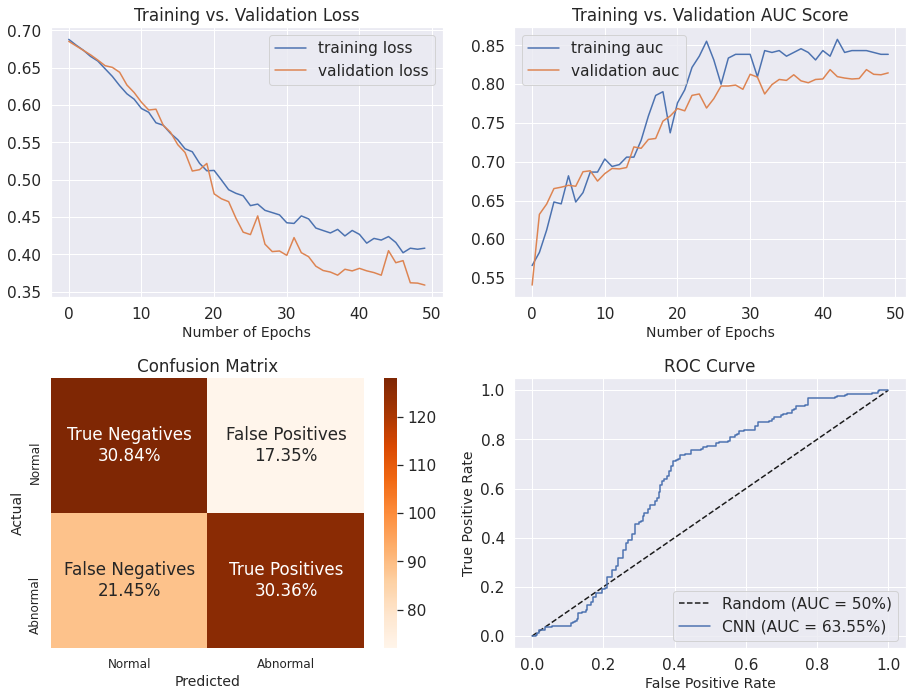

In [21]:
create_charts5(cnn5, cnn_model5)

**Superimposing Accuracy and Loss graphs for different Optimizers**

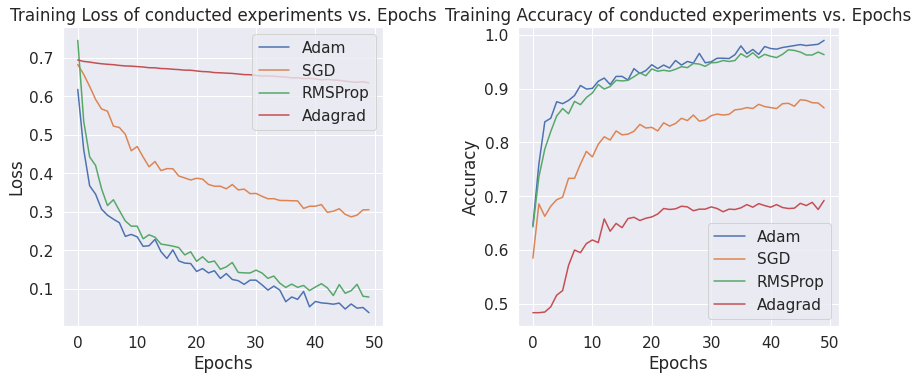

In [26]:
EPOCHS=50

record_arr1 = np.array([cnn_model1.history['loss'][0], cnn_model1.history['accuracy'][0]])
for i in range(1, EPOCHS):
    new_row1 = np.array([cnn_model1.history['loss'][i], cnn_model1.history['accuracy'][i]])
    record_arr1 = np.row_stack((record_arr1, new_row1))
    
record_df1 = pd.DataFrame(record_arr1, columns=["loss", "acc"])

record_arr2 = np.array([cnn_model2.history['loss'][0], cnn_model2.history['accuracy'][0]])
for i in range(1, EPOCHS):
    new_row2 = np.array([cnn_model2.history['loss'][i], cnn_model2.history['accuracy'][i]])
    record_arr2 = np.row_stack((record_arr2, new_row2))
    
record_df2 = pd.DataFrame(record_arr2, columns=["loss", "acc"])

record_arr3 = np.array([cnn_model3.history['loss'][0], cnn_model3.history['accuracy'][0]])
for i in range(1, EPOCHS):
    new_row3 = np.array([cnn_model3.history['loss'][i], cnn_model3.history['accuracy'][i]])
    record_arr3 = np.row_stack((record_arr3, new_row3))
    
record_df3 = pd.DataFrame(record_arr3, columns=["loss", "acc"])

record_arr4 = np.array([cnn_model4.history['loss'][0], cnn_model4.history['accuracy'][0]])
for i in range(1, EPOCHS):
    new_row4 = np.array([cnn_model4.history['loss'][i], cnn_model4.history['accuracy'][i]])
    record_arr4 = np.row_stack((record_arr4, new_row4))
    
record_df4 = pd.DataFrame(record_arr4, columns=["loss", "acc"])

record_arr5 = np.array([cnn_model5.history['loss'][0], cnn_model5.history['accuracy'][0]])
for i in range(1, EPOCHS):
    new_row5 = np.array([cnn_model5.history['loss'][i], cnn_model5.history['accuracy'][i]])
    record_arr5 = np.row_stack((record_arr5, new_row5))
    
record_df5 = pd.DataFrame(record_arr4, columns=["loss", "acc"])

#print curve
fig = plt.figure(figsize=(13, 10))
plt.subplot(2,2,1)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss of conducted experiments vs. Epochs')
plt.plot(np.arange(0, EPOCHS), record_df1["loss"], label='Adam')
plt.plot(np.arange(0, EPOCHS), record_df2["loss"], label='SGD')
plt.plot(np.arange(0, EPOCHS), record_df3["loss"], label='RMSProp')
#plt.plot(np.arange(0, EPOCHS), record_df4["loss"], label='Adadelta')
plt.plot(np.arange(0, EPOCHS), record_df5["loss"], label='Adagrad')
plt.legend()
# fig.saveplot(path1+'Loss')
plt.subplot(2,2,2)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy of conducted experiments vs. Epochs')
plt.plot(np.arange(0, EPOCHS), record_df1["acc"], label='Adam')
plt.plot(np.arange(0, EPOCHS), record_df2["acc"], label='SGD')
plt.plot(np.arange(0, EPOCHS), record_df3["acc"], label='RMSProp')
#plt.plot(np.arange(0, EPOCHS), record_df4["acc"], label='Adadelta')
plt.plot(np.arange(0, EPOCHS), record_df5["acc"], label='Adagrad')
plt.legend()
plt.tight_layout()

plt.show()

save_path='/content/drive/MyDrive/New Images'
fig.savefig(save_path+'New-26_Optimizer_withoutAda')